In [4]:
# Load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# Load data
data = pd.read_excel('rna_protein_ratio_data.xlsx')

Text(0,0.5,'RNA/Protein ratio')

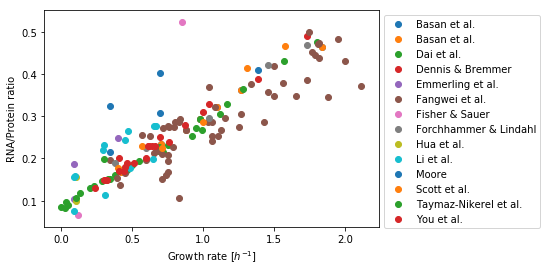

In [7]:
# Plot data by reference

data.groupby('Label').apply(lambda x: plt.scatter(x['Growth\nrate (1/h)'],x['RNA/Protein'],label=np.unique(x['Label'])[0]))
plt.legend(loc=2,bbox_to_anchor=(1,1))
plt.xlabel('Growth rate [$h^{-1}$]')
plt.ylabel('RNA/Protein ratio')

Text(0,0.5,'RNA/Protein ratio')

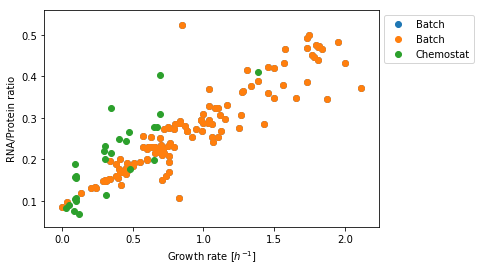

In [8]:
# Plot data by batch/chemostat

data.groupby('Mode').apply(lambda x: plt.scatter(x['Growth\nrate (1/h)'],x['RNA/Protein'],label=np.unique(x['Mode'])[0]))
plt.legend(loc=2,bbox_to_anchor=(1,1))
plt.xlabel('Growth rate [$h^{-1}$]')
plt.ylabel('RNA/Protein ratio')

(0, 1)

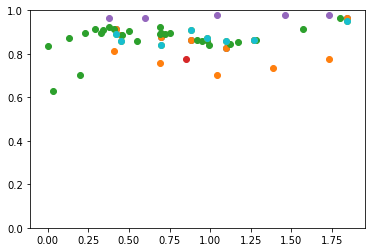

In [9]:
#plt.scatter(data['Growth\nrate (1/h)'],data['Cell dry weight [µg/mL OD600]'])
no_bremmer = data[data['Label'] != 'Dennis & Bremmer']
plot_prot = lambda x: plt.scatter(x['Growth\nrate (1/h)'],x['Total Protein\n(μg)/mL/OD 600']/500, label = np.unique(x['Label'])[0])
plot_prot_RNA = lambda x: plt.scatter(x['Growth\nrate (1/h)'],(x['Total RNA\n(μg)/mL/OD 600']+x['Total Protein\n(μg)/mL/OD 600'])/500, label = np.unique(x['Label'])[0])
plot_prot_RNA_frac = lambda x: plt.scatter(x['Growth\nrate (1/h)'],(x['Fraction of protein out of dry weight']+x['Fraction of RNA out of dry weight']), label = np.unique(x['Label'])[0])
plot_prot_frac = lambda x: plt.scatter(x['Growth\nrate (1/h)'],x['Fraction of protein out of dry weight'], label = np.unique(x['Label'])[0])
#no_bremmer[no_bremmer['Mode'] !='Chemostat'].groupby('Label').apply(plot_prot)
no_bremmer[no_bremmer['Mode'] !='Chemostat'].groupby('Label').apply(plot_prot_RNA)
data[data['Mode'] !='Chemostat'].groupby('Label').apply(plot_prot_RNA_frac)
#data[data['Mode'] !='Chemostat'].groupby('Label').apply(plot_prot_frac)
#plt.legend()
plt.ylim([0,1])

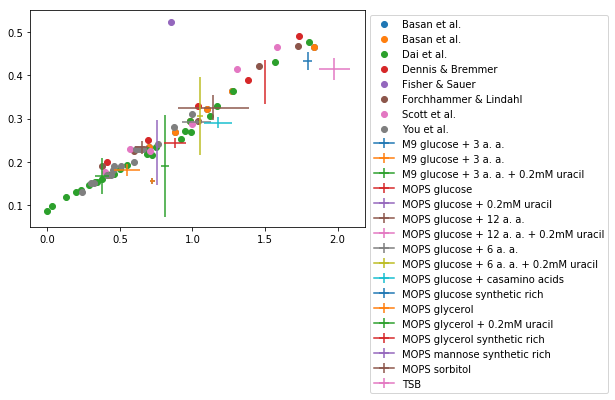

In [25]:
data[(data['Label']!='Fangwei et al.') & (data['Mode']=='Batch')].groupby('Label').apply(lambda x: plt.scatter(x['Growth\nrate (1/h)'],x['RNA/Protein'],label=np.unique(x['Label'])[0]))
jun = data[data['Label'] == 'Fangwei et al.']
#plt.plot(jun['Growth\nrate (1/h)'],jun['RNA/Protein'],'.')
jun.groupby('Nutrient Conditions').apply(lambda x: plt.errorbar(x=x['Growth\nrate (1/h)'].mean(),y=x['RNA/Protein'].mean(),xerr=x['Growth\nrate (1/h)'].std()/np.sqrt(x['RNA/Protein'].shape[0]-1),yerr=x['RNA/Protein'].std()/np.sqrt(x['RNA/Protein'].shape[0]-1),label=np.unique(x['Nutrient Conditions'])[0]))
#jun
plt.legend(loc=2,bbox_to_anchor=(1,1))

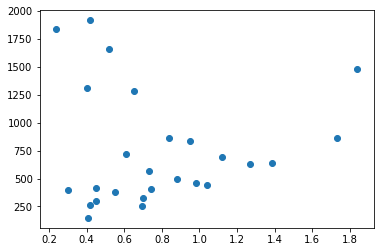

In [12]:
batch = data[data['Mode']=='Batch']
plt.scatter(data['Growth\nrate (1/h)'],(data['Cell dry weight [µg/mL OD600]']*1e-6/data['Cell concentration [# cells/mL OD600]'])/1e-15,label=data['Label'])
#plt.ylim([0,1e-12])
gr_to_v = lambda x: 0.27*2**(1.1*(x/np.log(2)))
v_to_p = lambda x: 104.5*x**0.59
#plt.scatter(data['Growth\nrate (1/h)'],v_to_p(gr_to_v(data['Growth\nrate (1/h)'])))
#plt.scatter(batch['Growth\nrate (1/h)'],600*gr_to_v(batch['Growth\nrate (1/h)']))



0.96526452916849725

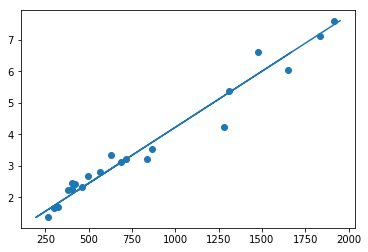

In [48]:
cdw = (data['Cell dry weight [µg/mL OD600]']*1e-6/data['Cell concentration [# cells/mL OD600]'])/1e-15
plt.scatter(cdw,data['Cell volume [µm^3]'])

from scipy import stats
new_data = pd.DataFrame(data =[data['Cell volume [µm^3]'],cdw])
new_data = new_data.T.dropna()
new_data.columns =['Cell volume [µm^3]','Cell dry weight [fg]']
r = stats.linregress(new_data['Cell volume [µm^3]'],new_data['Cell dry weight [fg]'])
plt.plot(data['Cell volume [µm^3]']*r.slope+r.intercept,data['Cell volume [µm^3]'])
r.rvalue**2

array([ 0.88874689,  1.08572543])

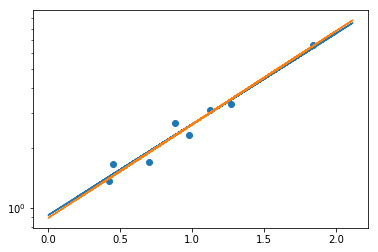

In [69]:
plt.scatter(data.loc[data['Mode'] == 'Batch','Growth\nrate (1/h)'],data.loc[data['Mode'] == 'Batch','Cell volume [µm^3]'])
plt.yscale('log')
tmp = data.loc[data['Mode']=='Batch',['Growth\nrate (1/h)','Cell volume [µm^3]']]
tmp.dropna(inplace=True)
r2 = stats.linregress(tmp['Growth\nrate (1/h)'],np.log(tmp['Cell volume [µm^3]']))
r2.rvalue**2
plt.plot(data.loc[data['Mode'] == 'Batch','Growth\nrate (1/h)'],np.exp(data.loc[data['Mode'] == 'Batch','Growth\nrate (1/h)']*r2.slope+r2.intercept))

from scipy.optimize import curve_fit


def exponenial_func(x, a, b):
    return a*np.exp(b*x)
popt, pcov = curve_fit(exponenial_func, tmp['Growth\nrate (1/h)'], tmp['Cell volume [µm^3]'], p0=(1, 1))
plt.plot(data.loc[data['Mode'] == 'Batch','Growth\nrate (1/h)'],exponenial_func(data.loc[data['Mode'] == 'Batch','Growth\nrate (1/h)'],*popt))
popt